In [ ]:
https://www.kaggle.com/code/mashhadurrehmankhan/loan-prediction
https://www.kaggle.com/code/smithbhavsar/loan-prediction

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Replace 'smart_application_dataset.csv' with actual dataset path)
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

# Preprocessing: Handling missing values
# Convert 'Loan_ID', if present, to numeric if it contains any numbers
if 'Loan_ID' in df.columns:
    try:
        df['Loan_ID'] = pd.to_numeric(df['Loan_ID'], errors='ignore')
    except (ValueError, TypeError):
        pass  # If conversion fails, leave as is

# Convert other object columns to numeric if they contain any numbers
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    except (ValueError, TypeError):
        pass  # If conversion fails, leave as is

# Now fill NaN values with the mean of numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Encoding categorical variables (for columns still as objects)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting dataset into features and target variable
X = df.drop(columns=['Loan_Status'])  # Assuming 'Loan_Status' is the target column
y = df['Loan_Status']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression()

# Creating an ensemble model with Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf),
    ('XGBoost', xgb),
    ('LogisticRegression', lr)
], voting='hard')

# Training the model
ensemble_model.fit(X_train, y_train)

# Making predictions
y_pred = ensemble_model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

<ipython-input-40-e3419157b81f>:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['Loan_ID'] = pd.to_numeric(df['Loan_ID'], errors='ignore')
<ipython-input-40-e3419157b81f>:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
<ipython-input-40-e3419157b81f>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, t

Ensemble Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files

uploaded = files.upload()  # Prompts file upload


Saving train_u6lujuX_CVtuZ9i (1).csv to train_u6lujuX_CVtuZ9i (1) (1).csv


In [ ]:
import pandas as pd

# Update file_path to the correct location of your dataset
# Examples:
# For Colab after uploading: file_path = "train_u6lujuX_CVtuZ9i (1).csv"
# For Colab after mounting Drive: file_path = "/content/drive/MyDrive/data/train_u6lujuX_CVtuZ9i (1).csv"
# For Kaggle: file_path = "/kaggle/input/your-dataset-name/train_u6lujuX_CVtuZ9i (1).csv"
# For local: file_path = "path/to/your/file/train_u6lujuX_CVtuZ9i (1).csv"

file_path = "train_u6lujuX_CVtuZ9i (1).csv"  # Replace with your correct path
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Married': df['Married'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0],
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0],
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)

In [ ]:
# Drop unnecessary column if it exists
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
encoder = LabelEncoder() # instantiate the encoder object which will be used to encode the categorical variables
for col in categorical_cols: # loop through the columns to encode them
    df[col] = encoder.fit_transform(df[col])
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)
else:
    print("Column 'Loan_ID' not found in the DataFrame.")

df.head()

Column 'Loan_ID' not found in the DataFrame.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


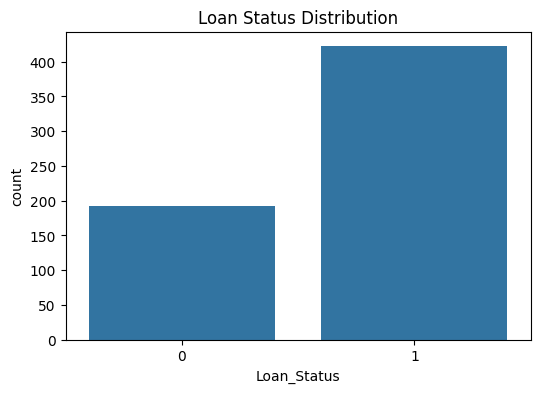

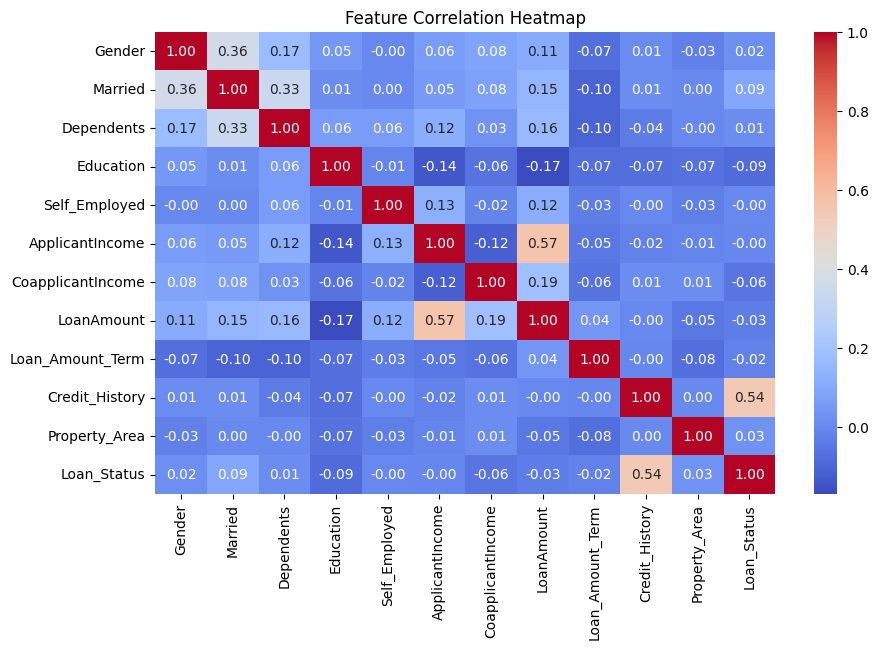

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Checking correlation between variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset
X = df.drop(columns=['Loan_Status']) # Features are all columns except Loan_Status
y = df['Loan_Status'] # Target variable i.e Loan_Status column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing data

# Training RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test) # Predicting the target variable using the test data

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred)) # Accuracy of the model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



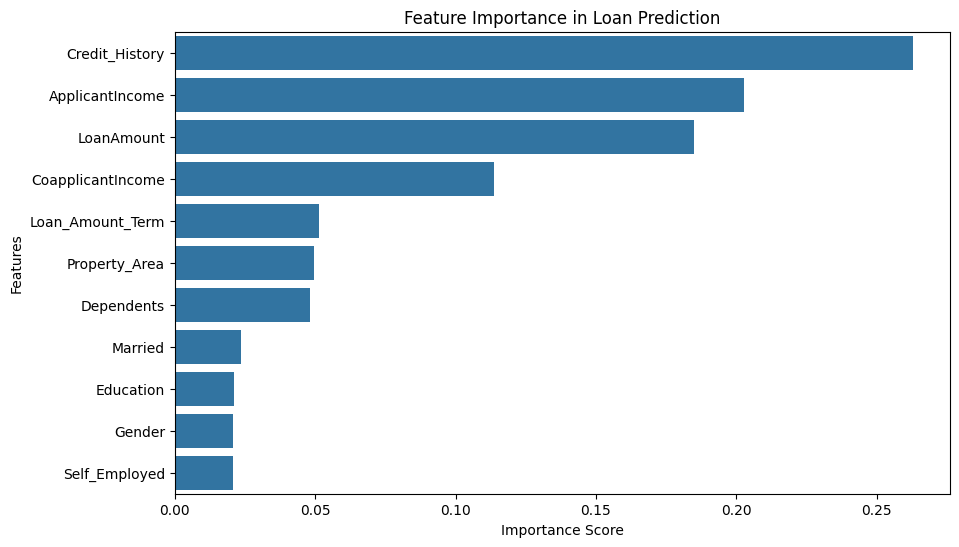

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index)
plt.title("Feature Importance in Loan Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(clf, "loan_eligibility_model.pkl")
print("Model saved as loan_eligibility_model.pkl")

Model saved as loan_eligibility_model.pkl


In [ ]:
# Load the saved model
model = joblib.load("loan_eligibility_model.pkl")

# Example new customer data (ensure it follows the same preprocessing steps)
new_customer = pd.DataFrame({
    'Gender': [1], 'Married': [1], 'Dependents': [0], 'Education': [0],
    'Self_Employed': [0], 'ApplicantIncome': [5000], 'CoapplicantIncome': [2000],
    'LoanAmount': [120], 'Loan_Amount_Term': [360], 'Credit_History': [1],
    'Property_Area': [2]
})

# Predict loan status
prediction = model.predict(new_customer)
print("Loan Approval Status:", "Approved" if prediction[0] == 1 else "Not Approved")

Loan Approval Status: Approved


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Making predictions
y_pred = ensemble_model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Ensemble Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Ensemble Model Accuracy: 0.78
Precision: 0.81
Recall: 0.78
F1 Score: 0.75
